Devang Patel Data Science Project

In [131]:
#import needed modules
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn


In [132]:
df = pd.read_csv('heart.csv')

In [133]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
continuous_features = ['age', 'trestbps','chol', 'thalach', 'oldpeak', 'ca']

In [137]:
count_with = len(df[df.target == 1])
count_without = len(df[df.target == 0])
total_num = len(df.target)
percent_with = (count_with / total_num) * 100
percent_without = (count_without / total_num) * 100
print('Percent of patients with heart disease: {:.2f}%'.format(percent_with))
print('Percent of patients without heart disease: {:.2f}%'.format(percent_without))


Percent of patients with heart disease: 54.46%
Percent of patients without heart disease: 45.54%


AxesSubplot(0.125,0.125;0.775x0.755)


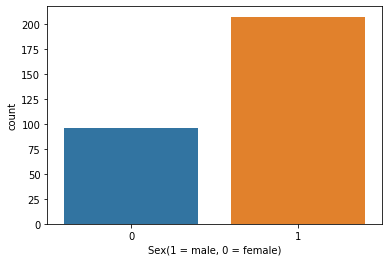

In [138]:
graph = sns.countplot(x = 'sex', data = df)
graph.set(xlabel = 'Sex(1 = male, 0 = female)')
print(graph)

NameError: name 'klajdf' is not defined